# <font color='blue'>Data Science Academy - Visualização de Dados e Design de Dashboards</font>

# Mapas com Basemap

In [1]:
!pip install basemap

In [2]:
# Importando o pandas para manipulação de dados
import pandas

http://openflights.org/data.html

In [3]:
# Carregando dados sobre aeroportos
airports = pandas.read_csv("airports.csv", header = None, dtype = str)
airports.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "desc"]
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone,type,desc
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [4]:
# Carregando dados sobre as companhias áereas
airlines = pandas.read_csv("airlines.csv", header = None, dtype = str)
airlines.columns = ["id", "name", "alias", "iata", "icao", "callsign", "country", "active"]
airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [5]:
# Carregando dados sobre as rotas
routes = pandas.read_csv("routes.csv", header = None, dtype = str)
routes.columns = ["airline", "airline_id", "source", "source_id", "dest", "dest_id", "codeshare", "stops", "equipment"]
routes.head()

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [6]:
# Limpeza nos dados
routes = routes[routes["airline_id"] != "\\N"]

In [7]:
import math

def haversine(lon1, lat1, lon2, lat2):
    
    # Converte as coordenadas para floats
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    
    # Converte valores
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Computa distância
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [8]:
def calc_dist(row):
    dist = 0
    try:
        # Compara origem e destino e obtém coordenadas
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        
        # Usa as coordenadas para calcular a distância
        dist = haversine(dest["longitude"], dest["latitude"], source["longitude"], source["latitude"])
    except (ValueError, IndexError):
        pass
    return dist

In [9]:
# Aplica o cálculo de distância às rotas
route_lengths = routes.apply(calc_dist, axis = 1)

(array([  2.31160000e+04,   1.97260000e+04,   9.94300000e+03,
          5.29800000e+03,   2.59000000e+03,   1.06300000e+03,
          8.39000000e+02,   1.01700000e+03,   9.12000000e+02,
          7.71000000e+02,   6.49000000e+02,   5.53000000e+02,
          2.47000000e+02,   2.32000000e+02,   1.46000000e+02,
          4.40000000e+01,   3.20000000e+01,   2.00000000e+00,
          0.00000000e+00,   4.00000000e+00]),
 array([     0.        ,    803.60790186,   1607.21580372,   2410.82370558,
          3214.43160744,   4018.0395093 ,   4821.64741116,   5625.25531302,
          6428.86321489,   7232.47111675,   8036.07901861,   8839.68692047,
          9643.29482233,  10446.90272419,  11250.51062605,  12054.11852791,
         12857.72642977,  13661.33433163,  14464.94223349,  15268.55013535,
         16072.15803721]),
 <a list of 20 Patch objects>)

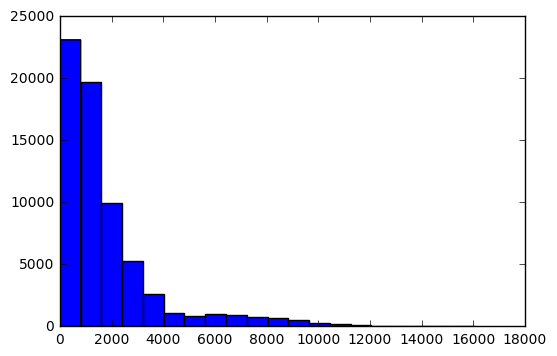

In [10]:
# Histograma do comprimento das rotas com Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(route_lengths, bins = 20)

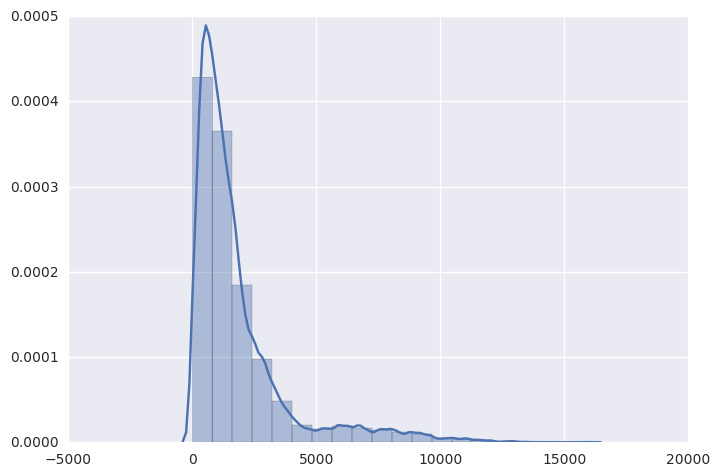

In [12]:
# # Histograma do comprimento das rotas com Seaborn
import seaborn
import warnings
warnings.filterwarnings('ignore')
seaborn.distplot(route_lengths, bins=20)

<Container object of 547 artists>

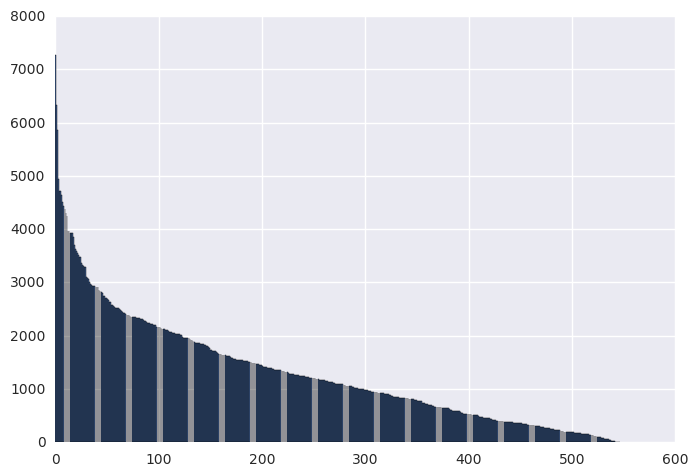

In [13]:
# Histograma do comprimento das rotas com Matplotlib e manipulando os dados com Numpy
import numpy

# Colocando colunas relevantes no dataframe
route_length_df = pandas.DataFrame({"length": route_lengths, "id": routes["airline_id"]})

# Calculando a rota média por companhia área
airline_route_lengths = route_length_df.groupby("id").aggregate(numpy.mean)

# Ordenando por tamanho
airline_route_lengths = airline_route_lengths.sort_values("length", ascending=False)

# Plot
plt.bar(range(airline_route_lengths.shape[0]), airline_route_lengths["length"])

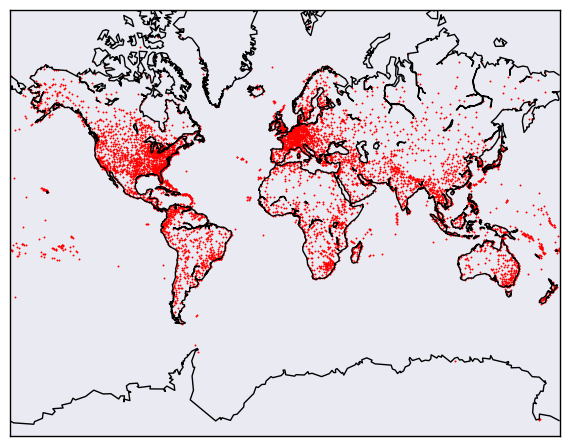

In [14]:
# Construindo Mapa com Basemap e visualizando os aeroportos
import mpl_toolkits.basemap
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Criando um mapa para desenhar. Estamos usando uma projeção mercator, e mostrando o mundo inteiro.
m = Basemap(projection = 'merc', 
            llcrnrlat = -80,
            urcrnrlat = 80,
            llcrnrlon = -180,
            urcrnrlon = 180,
            lat_ts = 20,
            resolution = 'c')

# Desenhando as linhas no mapa
m.drawcoastlines()
m.drawmapboundary()

# Convertendo latitude e longitude para coordenadas x e y
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Usando matplotlib para desenhar os pontos no mapa
m.scatter(x, y, 1, marker = 'o', color = 'red')

# Show the plot.
plt.show()

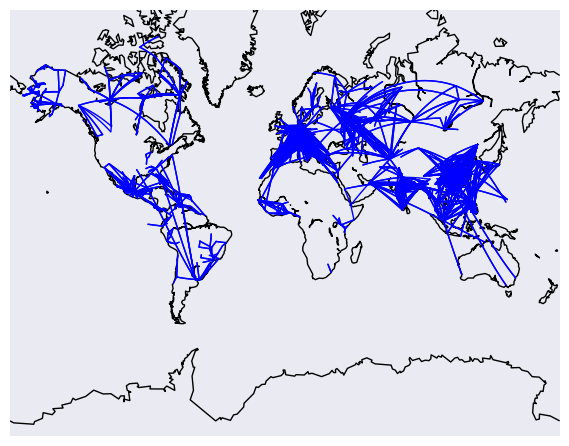

In [15]:
# Construindo Mapa com Basemap e visualizando as rotas
m = Basemap(projection = 'merc',
            llcrnrlat = -80,
            urcrnrlat = 80,
            llcrnrlon = -180,
            urcrnrlon = 180,
            lat_ts = 20,
            resolution = 'c')
m.drawcoastlines()

# Iteração pelas 3.000 primeiras linhas
for name, row in routes[:3000].iterrows():
    try:
        # Obtendo aeroportos de origem e destino
        source = airports[airports["id"] == row["source_id"]].iloc[0]
        dest = airports[airports["id"] == row["dest_id"]].iloc[0]
        
        # Não desenha rotas muito longas
        if abs(float(source["longitude"]) - float(dest["longitude"])) < 90:
            
            # Desenha uma linha curva entre aeroportos de origem e destino
            m.drawgreatcircle(float(source["longitude"]), float(source["latitude"]), float(dest["longitude"]), float(dest["latitude"]),linewidth=1,color='b')
    except (ValueError, IndexError):
        pass
    
# Mostra o mapa
plt.show()

## FIM